# Self Organizing Map (SOM)

Notebook ini berdasarkan kursus __Deep Learning A-Z™: Hands-On Artificial Neural Networks__ di Udemy. [Lihat Kursus](https://www.udemy.com/deeplearning/).

## Informasi Notebook
- __notebook name__: `taruma_udemy_som`
- __notebook version/date__: `1.0.1`/`20190729`
- __notebook server__: Google Colab
- __python version__: `3.6`

In [2]:
#### NOTEBOOK DESCRIPTION

from datetime import datetime

NOTEBOOK_TITLE = 'taruma_udemy_som'
NOTEBOOK_VERSION = '1.0.0'
NOTEBOOK_DATE = 1 # Set 1, if you want add date classifier

NOTEBOOK_NAME = "{}_{}".format(
    NOTEBOOK_TITLE, 
    NOTEBOOK_VERSION.replace('.','_')
)
PROJECT_NAME = "{}_{}{}".format(
    NOTEBOOK_TITLE, 
    NOTEBOOK_VERSION.replace('.','_'), 
    "_" + datetime.utcnow().strftime("%Y%m%d_%H%M") if NOTEBOOK_DATE else ""
)

print(f"Nama Notebook: {NOTEBOOK_NAME}")
print(f"Nama Proyek: {PROJECT_NAME}")

Nama Notebook: taruma_udemy_som_1_0_0
Nama Proyek: taruma_udemy_som_1_0_0_20190729_1028


In [3]:
#### System Version
import sys
print("Versi python: {}".format(sys.version))

Versi python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [0]:
#### Load Notebook Extensions
%load_ext google.colab.data_table

In [6]:
#### Download dataset
!wget -O SOM.zip "https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip"
!unzip SOM.zip

--2019-07-29 10:28:35--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.96.64
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.96.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17004 (17K) [application/zip]
Saving to: ‘SOM.zip’

SOM.zip             100%[===================>]  16.61K  --.-KB/s    in 0s      

2019-07-29 10:28:36 (124 MB/s) - ‘SOM.zip’ saved [17004/17004]

Archive:  SOM.zip
   creating: Self_Organizing_Maps/
  inflating: Self_Organizing_Maps/Credit_Card_Applications.csv  
   creating: __MACOSX/
   creating: __MACOSX/Self_Organizing_Maps/
  inflating: __MACOSX/Self_Organizing_Maps/._Credit_Card_Applications.csv  
  inflating: Self_Organizing_Maps/minisom.py  
  inflating: Self_Organizing_Maps/som.py  
  inflating

In [0]:
#### Atur dataset path
DATASET_DIRECTORY = 'Self_Organizing_Maps/'

# STEP 1

In [0]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Importing the dataset
# Dataset http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv(DATASET_DIRECTORY + 'Credit_Card_Applications.csv')
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(f"X Dimension = {X.shape}")
print(f"y Dimension = {y.shape}")

X Dimension = (690, 15)
y Dimension = (690,)


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

# STEP 2

In [0]:
# Training the SOM

# # Import module "minisom.py" from DATASET_DIRECTORY
# # ref: https://stackoverflow.com/a/67692/4886384
# MODULE_PATH = DATASET_DIRECTORY + 'minisom.py'
# import importlib.util
# spec = importlib.util.spec_from_file_location('minisom', MODULE_PATH)
# minisom = importlib.util.module_from_spec(spec)
# spec.loader.exec_module(minisom)

In [13]:
# Or using pip install (recent version minisom)
!pip install minisom

  Stored in directory: /root/.cache/pip/wheels/5c/46/22/d2aaf936c144c0ca6cdda2014ce9a763baff5ff8bf158b67fd
Successfully built minisom


In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [0]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# STEP 3

In [0]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

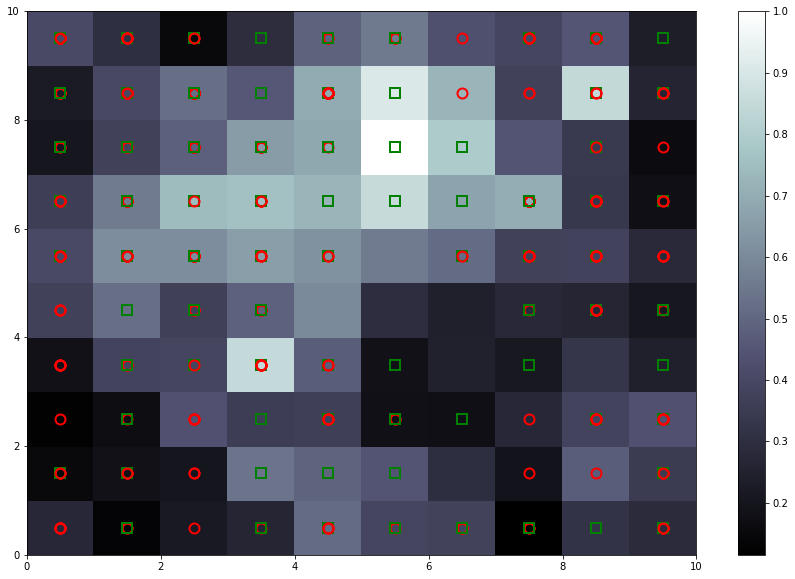

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

# STEP 4

In [0]:
# Finding the frauds
mappings = som.win_map(X)

In [37]:
frauds = np.concatenate((mappings[(3, 3)], mappings[(8, 8)]), axis=0)
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15683168.0,1.0,29.58,4.500,2.0,9.0,4.0,7.500,1.0,1.0,2.0,1.0,2.0,330.0,1.0
1,15682860.0,1.0,27.83,1.500,2.0,9.0,4.0,2.000,1.0,1.0,11.0,1.0,2.0,434.0,36.0
2,15684512.0,1.0,42.50,4.915,1.0,9.0,4.0,3.165,1.0,0.0,0.0,1.0,2.0,52.0,1443.0
3,15682576.0,0.0,32.17,1.460,2.0,9.0,4.0,1.085,1.0,1.0,16.0,0.0,2.0,120.0,2080.0
4,15682686.0,0.0,31.25,3.750,2.0,13.0,8.0,0.625,1.0,1.0,9.0,1.0,2.0,181.0,1.0
5,15684722.0,0.0,27.67,1.500,2.0,7.0,4.0,2.000,1.0,0.0,0.0,0.0,1.0,368.0,1.0
6,15682540.0,1.0,62.50,12.750,1.0,8.0,8.0,5.000,1.0,0.0,0.0,0.0,2.0,112.0,1.0
7,15684440.0,1.0,33.67,2.165,2.0,8.0,4.0,1.500,0.0,0.0,0.0,0.0,3.0,120.0,1.0
8,15683993.0,1.0,16.00,3.125,2.0,9.0,4.0,0.085,0.0,1.0,1.0,0.0,2.0,0.0,7.0
9,15683276.0,1.0,29.67,0.750,1.0,8.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,240.0,1.0
